# The Transient Model

The previous models using the NCBI high level genetic features used those features to classify phylogeny from the Open Tree of Life. However, perhaps more interesting patterns can by gained by looking at the transient changes of some genetic features to determine the genetic features within a certain phylogeny. Evolution, after all is a transient thing - dependent not only organism's mutations, but also environmental conditions.

We would need to merge our data with genetic features from NCBI, and classification from Open Tree of Life, with the origin times for organisms. Timetree has a beta site where you can input the Organisms and get a common ancestor origin time. This was scraped using the code below.



### IMPORT CSV file for Organism/Classes Dataframe

In [1]:
## same as P2_C_CONTACT_Classesv4

def df_string_list(str_p):
#str_p = df_subO_EP3_['Classes'][0][1:]
    str_p = str_p.replace('[','')
    str_p = str_p.replace(']','')

    strs = str_p.split(', ')
    return strs

def df_string_listB(str_p):
    try:
        strs = str_p.split('-')
    except:
        strs = ''
    return strs


In [2]:
import pandas as pd

df_sub_ = pd.read_csv('./out_CLASSES_utf_DOMAIN.csv', encoding='utf-8', sep=',')
df_sub_.head(2)

def df_string_listC(str_p):
    try:
        strs = str_p.split(', ')
    except:
        strs = ''
    return strs

df_sub_['Classes'] = df_sub_.Classes.map(lambda x: df_string_listC(x))

df_sub_['Classes'].loc[0] #[2]

[u'[[',
 u'Deinococcus',
 u'Deinococcaceae',
 u'Deinococcales',
 u'Deinococci',
 u'Deinococcus',
 u'Thermus',
 u'Bacteria',
 u'cellular organisms',
 u'life0]]']

In [3]:
# READ in CSV file Taxonomy dataframe (Names of Taxons)
import pandas as pd

df_TAXONOMY = pd.read_csv('./out_TAXONOMY.csv', encoding='utf-8', sep=',')

################ CLASS COUNTS for list to REMOVE TAXONOMIES that occur less than 12x

df_classesB = df_TAXONOMY
df_classesB = df_classesB[df_classesB['Classes'] >= 10] #Mask for Classes with >= 10 counts

df_classesB['Names'] = df_classesB['Names'].map(lambda x: str(x))


df_TAXONOMY = df_classesB
df_TAXONOMY.head(3)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed: 0             Names  Classes   Taxon
1718         253  Thermoproteaceae       10  family
1719         257      Natrialbales       10   order
1720         256    Thaumarchaeota       10  phylum

In [4]:
df_TAXONOMY[df_TAXONOMY['Taxon']=='domain']

Unnamed: 0      Names  Classes   Taxon
1980          13    Archaea      179  domain
1981          12  Eukaryota      207  domain
1989           4   Bacteria     1968  domain

In [5]:
#Group by Taxons:

group_with_Names = pd.DataFrame(df_TAXONOMY.groupby(['Taxon','Names'], as_index = False).sum())
group_just_Taxon = df_TAXONOMY['Classes'].groupby(df_TAXONOMY['Taxon']).sum()
#df_Taxon = pd.DataFrame(group.sum())




In [6]:
group_just_Taxon

Taxon
class                 1800
domain                2354
family                1281
genus                  671
infraclass              27
infrakingdom            22
infraorder              11
kingdom                173
no rank               3969
no rank - terminal     193
order                 1819
parvorder               10
phylum                2419
subclass                60
suborder                11
subphylum               15
superclass             110
superorder              15
tribe                   26
Name: Classes, dtype: int64

Get Names of particular Taxon category for each organism. It is faster to check for a particular selected level of Taxonomy (eg, Species up to Kingdom/Domain) in each organism's list of Taxonomy against the master list of which we got from value counts of the list of all Taxonomies. Generally, I think it's more practical to look at one level of Taxonomy at a time.

In [51]:
#Let's do kingdom first = classes_list
classes_list_1 = group_with_Names[group_with_Names['Taxon'] =='kingdom']['Names'].tolist() #domain, infrakingdom
classes_list_0 = group_with_Names[group_with_Names['Taxon'] =='infrakingdom']['Names'].tolist() #kingdom

In [52]:
classes_list_0

['Alveolata']

In [53]:


species_n = len(df_sub2_)
classes_p = []

import numpy as np

for i in df_sub1_.index.values:
    m = ''
    for k,l in enumerate(df_sub2_['Classes'][i]):
        print df_sub2_['Classes'][i][k]
        #print classes_list
        if df_sub2_['Classes'][i][k] in classes_list_0:
            m = df_sub2_['Classes'][i][k]
            print "Classes_list"
            break
        elif df_sub2_['Classes'][i][k] in classes_list_1:
            m = df_sub2_['Classes'][i][k]
            print "Classes_list0"
            break
        m = np.NaN
    classes_p.append(m)
    print m, " ",i
    
df_sub1_['Taxonomy'] = classes_p
df_sub1_.head(10)
#df_sub1_EP3B_[df_sub1_EP3B_['Classsub']=='']

[[
Deinococcus
Deinococcaceae
Deinococcales
Deinococci
Deinococcus
Thermus
Bacteria
cellular organisms
life0]]
nan   0
[[
Acaryochloris
FamilyI
SubsectionI
Cyanobacteria
Cyanobacteria sup.
Bacteria
cellular organisms
life0]]
nan   1
[[
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Bacteria
cellular organisms
life0]]
nan   2
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Bacteria
cellular organisms
life0]]
nan   3
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Bacteria
cellular organisms
life0]]
nan   4
[[
Acetobacter
Acetobacteraceae
Rhodospirillales
Alphaproteobacteria
Proteobacteria
Bacteria
cellular organisms
life0]]
nan   5
[[
Acetobacterium
Eubacteriaceae
Clostridiales
Clostridia
Firmicutes
Bacteria
cellular organisms
life0]]
nan   6
[[
Acetohalobium
Halobacteroidaceae
Halanaerobiales
Clostridia
Firmicutes
Bacteria
cellular organisms
life0]]
nan   7
[[
Acholeplasma
Acholeplasmataceae
A

Unnamed: 0  Unnamed: 0.1                            Organism   Kingdom  \
0           0             0  'Deinococcus soli' Cha et al. 2014  Bacteria   
1           1            12                Acaryochloris marina  Bacteria   
2           2            13                         Acetobacter  Bacteria   
3           3            14               Acetobacter ghanensis  Bacteria   
4           4            15            Acetobacter pasteurianus  Bacteria   
5           5            16            Acetobacter senegalensis  Bacteria   
6           6            17               Acetobacterium woodii  Bacteria   
7           7            18            Acetohalobium arabaticum  Bacteria   
8           8            24              Acholeplasma brassicae  Bacteria   
9           9            25              Acholeplasma laidlawii  Bacteria   

      Size  Chr            url     RPR    GC  \
0  3.23698  1.0  /genome/38191  3038.0  70.2   
1  8.36160  1.0   /genome/1179  7179.0  35.5   
2  3.10640  1.0  /genome/18005  1775.0  57.1   
3  2.84394  1.0  /genome/42306  2437.0  53.9   
4  3.34025  1.0    /genome/904  2955.0  57.2   
5  3.96991  1.0  /genome/42303  3373.0  55.5   
6  4.04478  1.0  /genome/11436  3521.0  36.6   
7  2.46960  1.0   /genome/1846  2286.0  50.4   
8  1.87779  1.0  /genome/22962  1672.0  29.6   
9  1.49699  1.0   /genome/1515  1352.0  27.8   

                                             Classes  \
0  [[[, Deinococcus, Deinococcaceae, Deinococcale...   
1  [[[, Acaryochloris, FamilyI, SubsectionI, Cyan...   
2  [[[, Acetobacteraceae, Rhodospirillales, Alpha...   
3  [[[, Acetobacter, Acetobacteraceae, Rhodospiri...   
4  [[[, Acetobacter, Acetobacteraceae, Rhodospiri...   
5  [[[, Acetobacter, Acetobacteraceae, Rhodospiri...   
6  [[[, Acetobacterium, Eubacteriaceae, Clostridi...   
7  [[[, Acetohalobium, Halobacteroidaceae, Halana...   
8  [[[, Acholeplasma, Acholeplasmataceae, Acholep...   
9  [[[, Acholeplasma, Acholeplasmataceae, Acholep...   

                                           Classsub1 Taxonomy      _Cat  
0  [Deinococcus, Deinococcaceae, Deinococcales, D...      NaN  Bacteria  
1  [Acaryochloris, FamilyI, SubsectionI, Cyanobac...      NaN  Bacteria  
2  [Acetobacter, Acetobacteraceae, Rhodospirillal...      NaN  Bacteria  
3  [Acetobacter, Acetobacteraceae, Rhodospirillal...      NaN  Bacteria  
4  [Acetobacter, Acetobacteraceae, Rhodospirillal...      NaN  Bacteria  
5  [Acetobacter, Acetobacteraceae, Rhodospirillal...      NaN  Bacteria  
6  [Acetobacterium, Eubacteriaceae, Clostridiales...      NaN  Bacteria  
7  [Acetohalobium, Halobacteroidaceae, Halanaerob...      NaN  Bacteria  
8  [Acholeplasma, Acholeplasmataceae, Acholeplasm...      NaN  Bacteria  
9  [Acholeplasma, Acholeplasmataceae, Acholeplasm...      NaN  Bacteria

In [54]:
df_sub1_ = df_sub_
df_sub2_ = df_sub1_.dropna().reset_index(drop=True) #for now...

In [55]:
print len(df_sub2_)
df_sub2_.head(3)

166


Unnamed: 0  Unnamed: 0.1             Organism    Kingdom      Size   Chr  \
0         132           322       Ananas comosus  Eukaryota   381.896  25.0   
1         137           339  Anolis carolinensis  Eukaryota  1799.140  13.0   
2         138           342    Anopheles gambiae  Eukaryota   265.027   5.0   

             url      RPR    GC  \
0  /genome/13945  23598.0  52.3   
1    /genome/708  34827.0  42.8   
2     /genome/46  14099.0  43.2   

                                             Classes  \
0  [[[, Ananas, Bromeliaceae, Poales, commelinids...   
1  [[[, Anolis, Polychrotinae, Iguanidae, Iguania...   
2  [[[, gambiae species complex, Pyretophorus, Ce...   

                                           Classsub1        Taxonomy  \
0  [Ananas, Bromeliaceae, Poales, commelinids, Pe...  Chloroplastida   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...         Metazoa   
2  [gambiae species complex, Pyretophorus, Cellia...         Metazoa   

        _Cat  
0  Eukaryota  
1  Eukaryota  
2  Eukaryota

WELL, we can just use the Eukaryote dataframe

In [56]:
import webbrowser

url = 'http://www.timetree.org/search/pairwise/' #Homo%20Sapiens/Gorilla%20Gorilla
p_species1 = "Homo%20Sapiens"
p_species2 = "Gorilla%20Gorilla"

url = url + p_species1,'/',p_species2
url = 'http://www.timetree.org/search/pairwise/Homo%20Sapiens/Gorilla%20Gorilla'
#webbrowser.open(url,new=2) #nice looking version

import requests
response = requests.get(url)
HTML = response.text

#week3, 5.3-prologue-to-web-scraping
#print HTML[:5000]

In [12]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import pandas as pd

import time

def totlength(species1):
    p_species1 = species1.replace(" ", "%20")
    p_species1b = species1.replace(" ", "+")
    url = 'http://timetreebeta.igem.temple.edu/api/widget/timeline/'
    url_gc = str(url) + p_species1+'?taxon='+p_species1b+'&selected='+p_species1b+'&id='+p_species1b
    site_all = "//div[@id='timeline-svg-wrapper']//text()"

    
    
    try:
        response = requests.get(url_gc)
        time.sleep(2) # delays for 2 seconds
        HTML = response.text
        print "URL: ", url_gc
    
        for_page = Selector(text=HTML).xpath(site_all)
        
        page_tot = for_page.extract()        

        gc = page_tot
    except:
        gc = ''
    return gc

#Try out for Homo sapiens
p_species1 = "Homo sapiens"
totlength(p_species1)

URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Homo%20sapiens?taxon=Homo+sapiens&selected=Homo+sapiens&id=Homo+sapiens


[u'            \n                ',
 u'\n                    ',
 u'EVOLUTIONARY TIMELINE FOR ',
 u'"Homo sapiens"',
 u', WITH DIVERGENCE TIMES (MYA)',
 u'\n                ',
 u'   \n                \n                ',
 u'\n                                \n',
 u'\n',
 u'\n',
 u'\n',
 u'  65.4',
 u'\n',
 u'\n',
 u'  82.7L',
 u'\n',
 u'\n',
 u'   100.0',
 u'\n',
 u'\n',
 u'\n\n                                \n',
 u'\n',
 u'\n',
 u'\n',
 u'   0.0',
 u'\n',
 u'\n',
 u'   5.6%',
 u'\n',
 u'\n',
 u'    11.3',
 u'\n',
 u'\n',
 u'\n\n                                \n',
 u'\n',
 u'\n',
 u'\n',
 u'   0.0',
 u'\n',
 u'\n',
 u'  16.6%',
 u'\n',
 u'\n',
 u'    33.2',
 u'\n',
 u'\n',
 u'\n\n                                \n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 

In [13]:
#df_164_sub['Tot'] = df_164_sub.Organism.map(lambda x: totlength(x))


def totlength_df(dataframe):
    
    start_p = 0
    stop_p = len(dataframe)
    list=[]
    for i in range(start_p, stop_p):
        print i
        list.append(totlength(dataframe.Organism[i])) #has to have Organism column in Dataframe
    return list


In [14]:
list = totlength_df(df_sub2_)

0
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/'Deinococcus%20soli'%20Cha%20et%20al.%202014?taxon='Deinococcus+soli'+Cha+et+al.+2014&selected='Deinococcus+soli'+Cha+et+al.+2014&id='Deinococcus+soli'+Cha+et+al.+2014
1
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Acaryochloris%20marina?taxon=Acaryochloris+marina&selected=Acaryochloris+marina&id=Acaryochloris+marina
2
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Acetobacter?taxon=Acetobacter&selected=Acetobacter&id=Acetobacter
3
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Acetobacter%20ghanensis?taxon=Acetobacter+ghanensis&selected=Acetobacter+ghanensis&id=Acetobacter+ghanensis
4
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Acetobacter%20pasteurianus?taxon=Acetobacter+pasteurianus&selected=Acetobacter+pasteurianus&id=Acetobacter+pasteurianus
5
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Acetobacter%20senegalensis?taxon=Acetobacter+seneg

In [15]:
# Need the list in a dataframe format
lengths_list = pd.DataFrame()
lengths_list['Tot'] = list
lengths_list.head(3)

Tot
0                                                 []
1  [            \n                , \n           ...
2  [            \n                , \n           ...

In [21]:
lengths_list.head(3)

Tot  \
0                                                 []   
1  [            \n                , \n           ...   
2  [            \n                , \n           ...   

                                                  T1    T2  
0                                                 []   0.0  
1  [EVOLUTIONARY TIMELINE FOR , "Acaryochloris ma...  46.0  
2  [EVOLUTIONARY TIMELINE FOR , "Acetobacter", , ...  45.0

In [22]:
import numpy as np

lengths_list['T1']=''
lengths_list['T2']=np.NaN

for i in range(0, len(lengths_list)):
    print i
    p_list = []
    l = 0
    m = 0
    p_len = len(lengths_list.Tot[i])
    print lengths_list.Tot[i]
    
    for k in range(0,p_len):
        if not str(lengths_list.Tot[i][k]).isspace():
            l = l + 1
            if lengths_list.Tot[i][k] == 'cellular organisms':
                m = l
            #print lengths_list.Tot[i][k]
            p_list.append(lengths_list.Tot[i][k])
    try:
        lengths_list['T1'][i] = p_list 
        lengths_list['T2'][i] = m
    except:
        pass

    
lengths_list.head(3)

0
[]
1
[u'            \n                ', u'\n                    ', u'EVOLUTIONARY TIMELINE FOR ', u'"Acaryochloris marina"', u', WITH DIVERGENCE TIMES (MYA)', u'\n                ', u'   \n                \n                ', u'\n                                \n', u'\n', u'\n', u'\n', u'  65.4', u'\n', u'\n', u'  82.7L', u'\n', u'\n', u'   100.0', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'   5.6%', u'\n', u'\n', u'    11.3', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'  16.6%', u'\n', u'\n', u'    33.2', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5
[u'            \n                ', u'\n                    ', u'EVOLUTIONARY TIMELINE FOR ', u'"Acetobacter senegalensis"', u', WITH DIVERGENCE TIMES (MYA)', u'\n                ', u'   \n                \n                ', u'\n                                \n', u'\n', u'\n', u'\n', u'  65.4', u'\n', u'\n', u'  82.7L', u'\n', u'\n', u'   100.0', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'   5.6%', u'\n', u'\n', u'    11.3', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'  16.6%', u'\n', u'\n', u'    33.2', u'\n', u'\n', u'\n\n                                \n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n

Tot  \
0                                                 []   
1  [            \n                , \n           ...   
2  [            \n                , \n           ...   

                                                  T1    T2  
0                                                 []   0.0  
1  [EVOLUTIONARY TIMELINE FOR , "Acaryochloris ma...  46.0  
2  [EVOLUTIONARY TIMELINE FOR , "Acetobacter", , ...  45.0

In [24]:
lengths_list['T3']= lengths_list.T1.map(lambda x: len(x))

lengths_list['T4']=''
lengths_list['T5']=''

for i in range(0, len(lengths_list)):

    k = int(lengths_list['T2'][i])
    m = int(lengths_list['T3'][i])
    n = m -k
    lengths_list['T4'][i] = lengths_list['T1'][i][k:]
    lengths_list['T5'][i] = lengths_list['T1'][i][k-n:k]

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
lengths_list.tail(3)

Tot  \
2254  [            \n                , \n           ...   
2255  [            \n                , \n           ...   
2256  [            \n                , \n           ...   

                                                     T1    T2  T3  \
2254  [EVOLUTIONARY TIMELINE FOR , "Tsukamurella pau...  44.0  47   
2255  [EVOLUTIONARY TIMELINE FOR , "Turicibacter", ,...  43.0  45   
2256  [EVOLUTIONARY TIMELINE FOR , "Turneriella parv...  43.0  45   

                      T4                                                T5  
2254  [1725, 4056, 4247]  [Actinobacteridae, Bacteria, cellular organisms]  
2255        [4056, 4247]                    [Bacteria, cellular organisms]  
2256        [4056, 4247]                    [Bacteria, cellular organisms]

In [69]:
df_sub2_.tail(3)

Unnamed: 0  Unnamed: 0.1                 Organism    Kingdom       Size  \
163        2217          7130     Thielavia terrestris  Eukaryota   36.91230   
164        2235          7379  Torulaspora delbrueckii  Eukaryota    9.22068   
165        2247          7396      Tribolium castaneum  Eukaryota  165.94400   

      Chr            url      RPR       GC  \
163   6.0  /genome/10696   9802.0  43.0000   
164   8.0  /genome/12254   4972.0  41.4625   
165  10.0    /genome/216  22611.0  34.4000   

                                               Classes  \
163  [[[, Thielavia, Chaetomiaceae, Sordariales, So...   
164  [[[, Torulaspora, Saccharomycetaceae, Saccharo...   
165  [[[, Tribolium, Tenebrioninae, Tenebrionidae, ...   

                                             Classsub1 Taxonomy       _Cat  
163  [Thielavia, Chaetomiaceae, Sordariales, Sordar...    Fungi  Eukaryota  
164  [Torulaspora, Saccharomycetaceae, Saccharomyce...    Fungi  Eukaryota  
165  [Tribolium, Tenebrioninae, Tenebrionidae, Tene...  Metazoa  Eukaryota

In [28]:
#Concatenate Time series info onto NCBI 

df_sub2_['T1'] = lengths_list['T1']
df_sub2_['T4'] = lengths_list['T4']
df_sub2_['T5'] = lengths_list['T5']

In [57]:
df_sub2_.head(3)

Unnamed: 0  Unnamed: 0.1             Organism    Kingdom      Size   Chr  \
0         132           322       Ananas comosus  Eukaryota   381.896  25.0   
1         137           339  Anolis carolinensis  Eukaryota  1799.140  13.0   
2         138           342    Anopheles gambiae  Eukaryota   265.027   5.0   

             url      RPR    GC  \
0  /genome/13945  23598.0  52.3   
1    /genome/708  34827.0  42.8   
2     /genome/46  14099.0  43.2   

                                             Classes  \
0  [[[, Ananas, Bromeliaceae, Poales, commelinids...   
1  [[[, Anolis, Polychrotinae, Iguanidae, Iguania...   
2  [[[, gambiae species complex, Pyretophorus, Ce...   

                                           Classsub1        Taxonomy  \
0  [Ananas, Bromeliaceae, Poales, commelinids, Pe...  Chloroplastida   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...         Metazoa   
2  [gambiae species complex, Pyretophorus, Cellia...         Metazoa   

        _Cat  
0  Eukaryota  
1  Eukaryota  
2  Eukaryota

In [37]:
import numpy as np

df_sub2_['Tdiver']=np.NaN

for i in range(0, len(lengths_list)):
    try:
        tot_p = int(df_sub2_['T4'][i][0])
    except:
        tot_p = np.NaN
    df_sub2_['Tdiver'][i] = tot_p

df_sub2_.head(3)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed: 0  Unnamed: 0.1                            Organism   Kingdom  \
0           0             0  'Deinococcus soli' Cha et al. 2014  Bacteria   
1           1            12                Acaryochloris marina  Bacteria   
2           2            13                         Acetobacter  Bacteria   

      Size  Chr            url     RPR    GC  \
0  3.23698  1.0  /genome/38191  3038.0  70.2   
1  8.36160  1.0   /genome/1179  7179.0  35.5   
2  3.10640  1.0  /genome/18005  1775.0  57.1   

                                             Classes  \
0  [[[, Deinococcus, Deinococcaceae, Deinococcale...   
1  [[[, Acaryochloris, FamilyI, SubsectionI, Cyan...   
2  [[[, Acetobacteraceae, Rhodospirillales, Alpha...   

                                           Classsub1  Taxonomy      _Cat  \
0  [Deinococcus, Deinococcaceae, Deinococcales, D...  Bacteria  Bacteria   
1  [Acaryochloris, FamilyI, SubsectionI, Cyanobac...  Bacteria  Bacteria   
2  [Acetobacter, Acetobacteraceae, Rhodospirillal...  Bacteria  Bacteria   

                               T4  \
0                              []   
1  [1037, 1037, 1180, 4056, 4247]   
2        [2045, 2850, 4056, 4247]   

                                                  T5  \
0                                                 []   
1  [Chroococcales, Oscillatoriophycideae, Cyanoba...   
2  [Alphaproteobacteria, Proteobacteria, Bacteria...   

                                                  T1  Tdiver  
0                                                 []     NaN  
1  [EVOLUTIONARY TIMELINE FOR , "Acaryochloris ma...  1037.0  
2  [EVOLUTIONARY TIMELINE FOR , "Acetobacter", , ...  2045.0

In [80]:
#pickle merged GC, Size, Chr, Org data - Just once
#df_sub2_.to_csv('./out_subO_Td.csv', encoding='utf-8')
df_sub3_READ_['Organism'] = df_sub2_READ_['Organism']
df_sub2_READ_.head(2)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1                            Organism  \
0           0             0             0  'Deinococcus soli' Cha et al. 2014   
1           1            12            12                Acaryochloris marina   

    Kingdom     Size  Chr            url     RPR    GC  \
0  Bacteria  3.23698  1.0  /genome/38191  3038.0  70.2   
1  Bacteria  8.36160  1.0   /genome/1179  7179.0  35.5   

                                             Classes  \
0  [[[, Deinococcus, Deinococcaceae, Deinococcale...   
1  [[[, Acaryochloris, FamilyI, SubsectionI, Cyan...   

                                           Classsub1  Taxonomy      _Cat  \
0  [Deinococcus, Deinococcaceae, Deinococcales, D...  Bacteria  Bacteria   
1  [Acaryochloris, FamilyI, SubsectionI, Cyanobac...  Bacteria  Bacteria   

                               T4  \
0                              []   
1  [1037, 1037, 1180, 4056, 4247]   

                                                  T5  \
0                                                 []   
1  [Chroococcales, Oscillatoriophycideae, Cyanoba...   

                                                  T1  Tdiver  
0                                                 []     NaN  
1  [EVOLUTIONARY TIMELINE FOR , "Acaryochloris ma...  1037.0

In [81]:
df_sub2_READ_ = pd.read_csv('./out_subO_Td.csv', encoding='utf-8', sep=',')
df_sub3_READ_ = pd.DataFrame()
df_sub3_READ_['Organism'] = df_sub2_READ_['Organism']
df_sub3_READ_['Tdiver'] = df_sub2_READ_['Tdiver']
#merge back accidental write over
df_subZA_ = pd.merge(df_sub2_, df_sub3_READ_, on='Organism', how='inner')
df_subZA_.tail(3)

Unnamed: 0  Unnamed: 0.1                 Organism    Kingdom       Size  \
163        2217          7130     Thielavia terrestris  Eukaryota   36.91230   
164        2235          7379  Torulaspora delbrueckii  Eukaryota    9.22068   
165        2247          7396      Tribolium castaneum  Eukaryota  165.94400   

      Chr            url      RPR       GC  \
163   6.0  /genome/10696   9802.0  43.0000   
164   8.0  /genome/12254   4972.0  41.4625   
165  10.0    /genome/216  22611.0  34.4000   

                                               Classes  \
163  [[[, Thielavia, Chaetomiaceae, Sordariales, So...   
164  [[[, Torulaspora, Saccharomycetaceae, Saccharo...   
165  [[[, Tribolium, Tenebrioninae, Tenebrionidae, ...   

                                             Classsub1 Taxonomy       _Cat  \
163  [Thielavia, Chaetomiaceae, Sordariales, Sordar...    Fungi  Eukaryota   
164  [Torulaspora, Saccharomycetaceae, Saccharomyce...    Fungi  Eukaryota   
165  [Tribolium, Tenebrioninae, Tenebrionidae, Tene...  Metazoa  Eukaryota   

     Tdiver  
163   352.0  
164   764.0  
165    48.0

In [85]:
#Use classification from earlier
df_subZA_.columns

Index([  u'Unnamed: 0', u'Unnamed: 0.1',     u'Organism',      u'Kingdom',
               u'Size',          u'Chr',          u'url',          u'RPR',
                 u'GC',      u'Classes',    u'Classsub1',     u'Taxonomy',
               u'_Cat',       u'Tdiver'],
      dtype='object')

In [89]:

df_subZA_ = df_subZA_.dropna().reset_index(drop=True) #for now...

In [91]:
df_subZA_._Cat.value_counts()

Eukaryota    160
Name: _Cat, dtype: int64

In [88]:
df_subZA_.Taxonomy.value_counts()

Metazoa           54
Fungi             44
Chloroplastida    40
Alveolata         22
Name: Taxonomy, dtype: int64

In [99]:
df_subZA_[df_subZA_['Taxonomy'].isin(['Metazoa','Fungi', 'Choroplastida','Alveolata']) == True]

Unnamed: 0  Unnamed: 0.1                               Organism  \
1           137           339                    Anolis carolinensis   
2           138           342                      Anopheles gambiae   
3           142           359                         Apis mellifera   
8           168           430                  Aspergillus fumigatus   
9           169           431                   Aspergillus nidulans   
10          184           527                       Babesia bigemina   
11          185           528                          Babesia bovis   
13          274           879                      Bombus terrestris   
14          297           912                             Bos taurus   
15          298           918                       Botrytis cinerea   
18          347          1096                Caenorhabditis briggsae   
19          348          1097                 Caenorhabditis elegans   
21          363          1124                     Callithrix jacchus   
23          380          1157                       Candida albicans   
24          381          1158                   Candida dubliniensis   
25          382          1159                       Candida glabrata   
26          463          1269                 Canis lupus familiaris   
27          468          1275                           Capra hircus   
29          514          1488                    Chlorocebus sabaeus   
30          522          1509                        Chrysemys picta   
32          526          1517                     Ciona intestinalis   
34          612          1744                      Coturnix japonica   
35          627          1802                Cryptococcus neoformans   
36          628          1804                 Cryptosporidium parvum   
39          643          1866                  Cyberlindnera jadinii   
40          649          1885                 Cynoglossus semilaevis   
41          652          1899                            Danio rerio   
43          654          1906                  Debaryomyces hansenii   
44          747          2081                  Drechmeria coniospora   
45          748          2087                Drosophila melanogaster   
..          ...           ...                                    ...   
122        1643          5227                    Plasmodium knowlesi   
123        1644          5228                  Plasmodium reichenowi   
124        1645          5229                       Plasmodium vivax   
125        1646          5230                      Plasmodium yoelii   
126        1658          5255                           Pongo abelii   
129        1773          5760                      Rattus norvegicus   
130        1862          5988               Saccharomyces arboricola   
131        1863          5989               Saccharomyces cerevisiae   
132        1864          5993                Saccharomyces eubayanus   
133        1866          5995  Saccharomycetaceae sp. 'Ashbya aceri'   
134        1876          6018                            Salmo salar   
135        1883          6111               Scheffersomyces stipitis   
136        1884          6112                    Schistosoma mansoni   
137        1885          6113              Schizosaccharomyces pombe   
143        1988          6493                  Sporisorium reilianum   
144        2087          6813                    Strongyloides ratti   
145        2088          6836             Sugiyamaella lignohabitans   
146        2109          6894                             Sus scrofa   
147        2119          6987                    Taeniopygia guttata   
148        2120          6990                      Takifugu rubripes   
149        2132          7023                Tetrahymena thermophila   
150        2133          7024                 Tetrapisispora blattae   
151        2134          7025                 Tetrapisispora phaffii   
152        2141          7038                

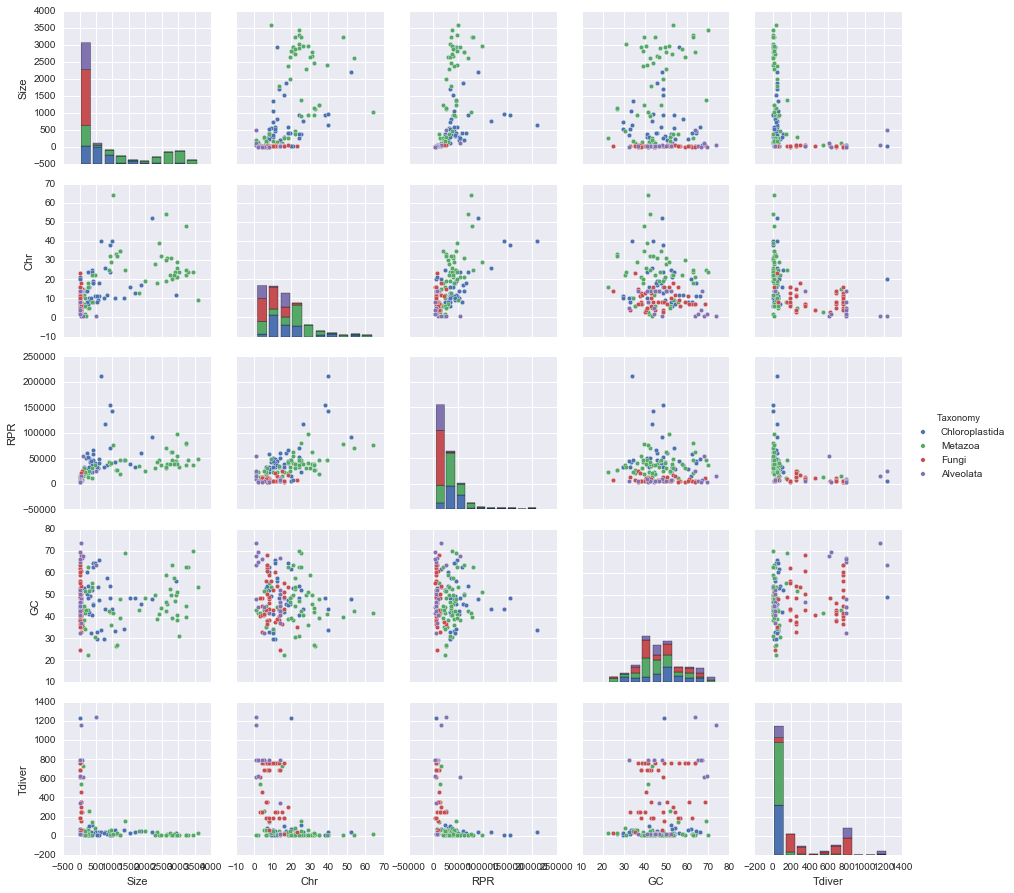

In [108]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_subZA_[[c for c in df_subZA_.columns if c in ['Organism','Size', 'Chr', 'RPR', 'GC', 'Tdiver', 'Taxonomy']]], hue='Taxonomy')

Time scale should probably be exponential as with most population behaviors with time exhibit exponential time dependencies.
TimeTree has 4600 MYA as the earliest origin point from which life began so to convert the divergence time: Tdiver [Million Years Ago] to TdivB [exponential Million Years since origin] I tried to use the following apply lambda function.

In [119]:
import numpy as np

df_subZA_['Texp'] = df_subZA_['Tdiver'].apply(lambda x: np.exp((4600 - x)*.001))
df_subZA_.head(3)

Unnamed: 0  Unnamed: 0.1             Organism    Kingdom      Size   Chr  \
0         132           322       Ananas comosus  Eukaryota   381.896  25.0   
1         137           339  Anolis carolinensis  Eukaryota  1799.140  13.0   
2         138           342    Anopheles gambiae  Eukaryota   265.027   5.0   

             url      RPR    GC  \
0  /genome/13945  23598.0  52.3   
1    /genome/708  34827.0  42.8   
2     /genome/46  14099.0  43.2   

                                             Classes  \
0  [[[, Ananas, Bromeliaceae, Poales, commelinids...   
1  [[[, Anolis, Polychrotinae, Iguanidae, Iguania...   
2  [[[, gambiae species complex, Pyretophorus, Ce...   

                                           Classsub1        Taxonomy  \
0  [Ananas, Bromeliaceae, Poales, commelinids, Pe...  Chloroplastida   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...         Metazoa   
2  [gambiae species complex, Pyretophorus, Cellia...         Metazoa   

        _Cat  Tdiver   TdivB       Texp  
0  Eukaryota   109.0  4491.0  89.210612  
1  Eukaryota    48.0  4552.0  94.821863  
2  Eukaryota    57.0  4543.0  93.972295

In [121]:
df_subZA_.describe()

Unnamed: 0  Unnamed: 0.1         Size         Chr            RPR  \
count   160.000000    160.000000   160.000000  160.000000     160.000000   
mean   1142.031250   3617.700000   739.410865   15.418750   29397.268750   
std     619.400638   2068.842753  1049.631634   11.070655   29478.835845   
min     132.000000    322.000000     8.179710    1.000000    3659.000000   
25%     647.500000   1880.250000    20.052100    7.750000    6286.500000   
50%    1066.000000   3402.500000   200.848000   13.500000   23386.500000   
75%    1640.250000   5224.250000   989.306500   21.000000   41668.750000   
max    2247.000000   7396.000000  3598.440000   64.000000  210715.000000   

               GC       Tdiver        TdivB        Texp  
count  160.000000   160.000000   160.000000  160.000000  
mean    47.339986   222.718750  4377.281250   83.050428  
std     10.326272   313.042207   313.042207   21.022838  
min     22.600000     2.000000  3360.000000   28.789191  
25%     40.900000    12.750000  4252.500000   70.281132  
50%     45.800000    42.500000  4557.500000   95.344831  
75%     53.300000   347.500000  4587.250000   98.223952  
max     73.800000  1240.000000  4598.000000   99.285546

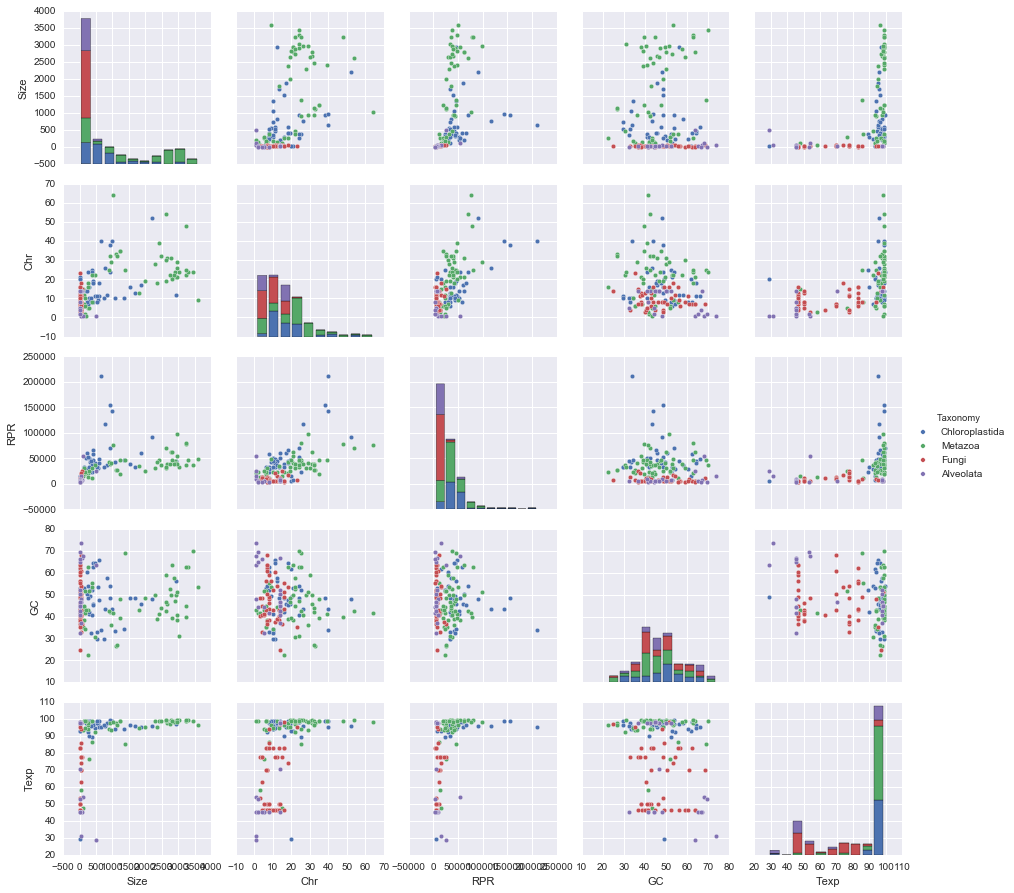

In [122]:
#Recheck with exponential time series
sns.pairplot(df_subZA_[[c for c in df_subZA_.columns if c in ['Organism','Size', 'Chr', 'RPR', 'GC', 'Texp', 'Taxonomy']]], hue='Taxonomy')

The Exploratory Data Analysis with the exponential time series, shows a more clearer pattern in the with all the factors with respect to Texp. GC% variation is widely distributed, while Size, Chromosome, and Protein number track each other. Instead of using these factors to predict time, I think it's better to use time and 3 of the other genetic features to predict one of the others. Maybe the most interesting target features might be Protein number, so I'll start with that. Since that is a quantitative feature, this is no longer classification modeling. We should start with Linear Regression the most simple model, and should run each model separately for each Kingdom.

In [163]:
-

Linear Regression Model:::  Metazoa
R2 Score:  0.609985123795
          coef feature
0  7259.386253    Size
1  7876.331571     Chr
2  1912.664902      GC
3 -2128.118228    Texp


(array([ 38951.12807335]),
 array([ 7259.38625295,  7876.33157081,  1912.66490207, -2128.11822821]))

In [156]:
LinearRegression_mod('Fungi')

Linear Regression Model:::  Fungi
R2 Score:  0.652742267724
          coef feature
0  4373.843860    Size
1   580.941208     Chr
2  -621.375890      GC
3  -272.487882    Texp


(array([ 7946.18532609]),
 array([ 4373.84386004,   580.94120803,  -621.37589004,  -272.48788232]))

Not a bad model of 61% R2 score for Protein Number. We can try again with Interactions between factors in the formula...

In [164]:
LinearRegression_mod('Chloroplastida')

Linear Regression Model:::  Chloroplastida
R2 Score:  0.118447778999
           coef feature
0   4426.911619    Size
1  11374.038225     Chr
2  -3440.062812      GC
3   6884.898318    Texp


(array([ 43706.19106491]),
 array([  4426.91161901,  11374.038225  ,  -3440.06281171,   6884.89831751]))

In [158]:
import numpy as np
#WITH Interactions Linear Regression for Protein number 'RPR'
def LinearRegression_mod2(p_Taxonomy):
    print "Linear Regression Model::: ", p_Taxonomy
    df_C1 = pd.DataFrame()
    df_C1 = df_subZA_[df_subZA_['Taxonomy'] == p_Taxonomy]
    df_C1 = df_C1[['Size', 'Chr', 'RPR', 'GC', 'Texp']] #Include target
    Y =df_C1["RPR"] #target

    #WITH Interactions
    formula_c =  'RPR ~ (Size + Chr + GC + Texp)**2 - 1' 
    formula_c = str(formula_c)

    from patsy import dmatrices
    Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

    from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
    from sklearn.metrics import accuracy_score

    ###NORMALIZE THE PREDICTOR VARIABLES!
    Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

    # Define Model
    linreg = LinearRegression()

    # split into train/test
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(Xb_mat, Yb, test_size=0.3, random_state=42)

    #fit a model on the training data and test on the testing data
    model = linreg.fit(X_train, y_train)
    # print model

    # make predictions
    predictions = linreg.predict(X_test)
    t = linreg.coef_

    from sklearn.metrics import r2_score
    print "R2 Score: ", r2_score(y_test, predictions)
    house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})
    print house_coefs #Correlations
    return linreg.intercept_, linreg.coef_[0]

LinearRegression_mod2('Metazoa')

Linear Regression Model:::  Metazoa
R2 Score:  -3.83023669552
            coef    feature
0  -95704.970556       Size
1  202146.620291        Chr
2  -65707.266887         GC
3  -25601.861093       Texp
4   25359.334405   Size:Chr
5     935.966195    Size:GC
6   92703.268349  Size:Texp
7    3358.918644     Chr:GC
8 -218892.391841   Chr:Texp
9   69176.578855    GC:Texp


(array([ 38895.70392131]),
 array([ -95704.97055616,  202146.62029096,  -65707.2668868 ,
         -25601.86109333,   25359.33440529,     935.96619496,
          92703.26834949,    3358.91864431, -218892.39184056,
          69176.57885456]))

In [161]:
LinearRegression_mod2('Fungi')

Linear Regression Model:::  Fungi
R2 Score:  0.790282961469
          coef    feature
0  1643.497570       Size
1   378.125819        Chr
2   177.294960         GC
3  -753.443283       Texp
4  2624.011497   Size:Chr
5 -2505.191936    Size:GC
6  3171.584529  Size:Texp
7  -502.538433     Chr:GC
8 -1177.138347   Chr:Texp
9   620.998363    GC:Texp


(array([ 7801.62839222]),
 array([ 1643.49756976,   378.12581925,   177.29496009,  -753.44328343,
         2624.01149683, -2505.19193628,  3171.58452913,  -502.53843329,
        -1177.13834705,   620.99836276]))

In [162]:
LinearRegression_mod2('Chloroplastida')

Linear Regression Model:::  Chloroplastida
R2 Score:  0.560067287822
            coef    feature
0   25203.435530       Size
1  263752.830670        Chr
2  -41000.873149         GC
3   -3912.609250       Texp
4     906.444892   Size:Chr
5  -18247.221774    Size:GC
6   -3258.761601  Size:Texp
7 -117063.266362     Chr:GC
8 -135984.906963   Chr:Texp
9   78045.060870    GC:Texp


(array([ 45492.73357768]),
 array([  25203.43552981,  263752.83067044,  -41000.87314927,
          -3912.60924967,     906.44489231,  -18247.22177394,
          -3258.7616008 , -117063.26636216, -135984.90696336,
          78045.06087003]))

At these time intervals it looks like interactions with time is actually worse for model fit for Metazoa, while a better fit for Fungi. When we look back at the seaborn pairplots, perhaps the time scale needs to be more carefully modified than the exponential formula with the base of 4600 MYA. Perhaps the time origin needs to be taken from the time of origin for each Taxonomy level. At any rate, even with simple linear regression, we can see that the Protein feature can have pretty good prediction from the exponential time and other high level genetic features. For Metazoa, and Choloroplastida it seems, Chromosome number is the most important feature. For Fungi, the Size:Texp combination was the most important. 